In [2]:
'''This script is a part of Monash Sprint Challenge'''
   
__author__ = 'Sandeep Kumar Kola'
__email__ = 'sandeep.kola07@gmail.com' 

Date: 13/05/2018

Version: 1.0

Environment: Python 3.6 and Jupyter notebook

Libraries used:
* pandas (for dataframes, included in Anaconda Python 3.6)
* numpy (for arrays, included in Anaconda Python 3.6)
* matplotlib(for 2D plots, included in Anaconda Python 3.6)
* mpl_toolkits (Axes3D for 3D plots)
* If mpl_toolkits library is not installed on your machine, use pip install mpl_toolkits to install it.

#### 1) Import the required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### 2) Read the data.

In [4]:
dataset4 = pd.read_csv("dataset4_with_outliers.csv")
dataset4_solution = dataset4

In [5]:
# Let's look at few values.
dataset4_solution.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,5437400630,20141016T000000,625000.0,4,2.25,1920,8259,2.0,0,0,4,8,1920,0,1979,0,98027,47.5616,-122.088
1,3999300290,20141016T000000,850000.0,3,3.50,2620,11148,2.0,0,4,4,9,2060,560,1977,0,98008,47.5845,-122.115
2,2525059134,20141016T000000,500000.0,2,1.50,1760,12000,1.0,0,0,4,7,1760,0,1964,0,98052,47.6288,-122.109
3,1862400285,20141016T000000,375000.0,3,1.00,1200,5404,1.0,0,0,3,6,1200,0,1937,0,98117,47.6969,-122.368
4,7199320190,20141016T000000,618000.0,4,2.25,2470,7350,1.0,0,0,3,7,1600,870,1978,0,98052,47.6936,-122.128


In [6]:
# Let's check the corelation of varables.
correlation_matrix = dataset4_solution.corr()
correlation_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.000000,-0.009097,0.003085,-0.000628,-0.014713,-0.146646,0.023681,-0.004467,0.017886,-0.022657,0.007552,-0.010341,-0.010427,0.023282,-0.020583,-0.004965,-0.002842,0.014752
price,-0.009097,1.000000,0.322463,0.542735,0.719577,0.134640,0.297020,0.040854,0.302720,-0.008043,0.711380,0.625579,0.282882,0.130036,0.056560,-0.033390,0.370523,0.070152
bedrooms,0.003085,0.322463,1.000000,0.474310,0.555541,0.031983,0.155126,-0.014325,0.064011,0.025449,0.326311,0.448363,0.283988,0.152412,0.012249,-0.133996,-0.011715,0.126915
bathrooms,-0.000628,0.542735,0.474310,1.000000,0.738947,0.107096,0.502693,0.000052,0.154718,-0.146713,0.652534,0.666854,0.244184,0.554162,0.024537,-0.214465,0.001736,0.241135
sqft_living,-0.014713,0.719577,0.555541,0.738947,1.000000,0.194880,0.349545,0.012330,0.234978,-0.081808,0.749753,0.873474,0.385345,0.352420,0.021656,-0.201062,0.035915,0.266074
sqft_lot,-0.146646,0.134640,0.031983,0.107096,0.194880,1.000000,-0.005045,0.039178,0.093621,-0.010904,0.129833,0.201427,0.015952,0.056667,0.010463,-0.132849,-0.085409,0.251319
floors,0.023681,0.297020,0.155126,0.502693,0.349545,-0.005045,1.000000,-0.006412,0.012968,-0.272341,0.452949,0.519279,-0.270828,0.516152,-0.002684,-0.061779,0.038888,0.121152
waterfront,-0.004467,0.040854,-0.014325,0.000052,0.012330,0.039178,-0.006412,1.000000,0.253684,0.013168,0.005085,-0.000648,0.026393,-0.035528,0.080433,0.039276,-0.044910,-0.057769
view,0.017886,0.302720,0.064011,0.154718,0.234978,0.093621,0.012968,0.253684,1.000000,0.026604,0.200896,0.128313,0.236363,-0.043327,0.057207,0.079862,-0.004763,-0.064269
condition,-0.022657,-0.008043,0.025449,-0.146713,-0.081808,-0.010904,-0.272341,0.013168,0.026604,1.000000,-0.169918,-0.170738,0.156644,-0.343027,-0.058381,-0.013056,-0.047949,-0.086093


*  From the corelation matrix we see that some variables are correaltied highly.
* Over all we see that variables, price, sqft_living, grade, sqft_above, bathrooms are related to each other.
* So if one variable is high it means that most likely others should be relaively high.

#### 3) First fix outliers in bedrooms.

<function matplotlib.pyplot.show(*args, **kw)>

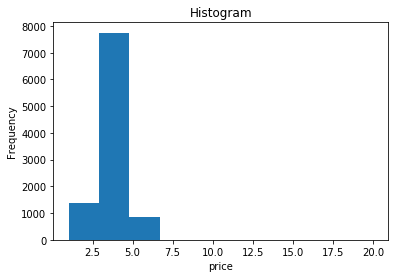

In [7]:
# Let's plot a histogram.
plt.hist(dataset4_solution["bedrooms"])
plt.title("Histogram")
plt.xlabel("price")
plt.ylabel("Frequency")
plt.show

Axes(0.125,0.125;0.775x0.755)


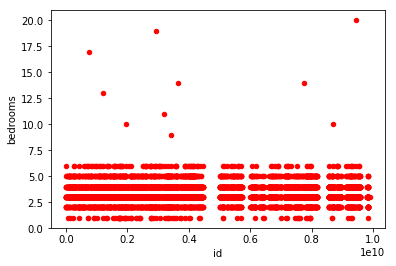

In [8]:
# Let's do a scatter plot.
plot = dataset4_solution.plot(kind='scatter', x='id', y='bedrooms', color='r')  
print(plot)

* Values greater than 7.5 seems to be outliers.
* Seems logical as values 6+ bedrooms in a home is quite strange.
* Let's remove the outliers values.

In [9]:
dataset4_solution = dataset4_solution[dataset4_solution["bedrooms"] < 7.5]

#### 4) Let's use 2d and 3d plots to know more about the relationship between price, sqft_living, grade.
* Considering the 70% corelation from the corelation matrix among price, sqft_living, grade.

Axes(0.125,0.125;0.775x0.755)


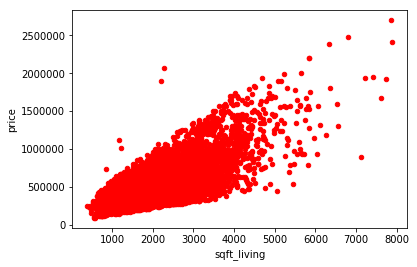

In [10]:
# Let's see the relationship between price and sqft_living.
plot = dataset4_solution.plot(kind='scatter', x='sqft_living', y='price', color='r')  
print(plot)

* There seems to be definite outliers.

Axes(0.125,0.125;0.775x0.755)


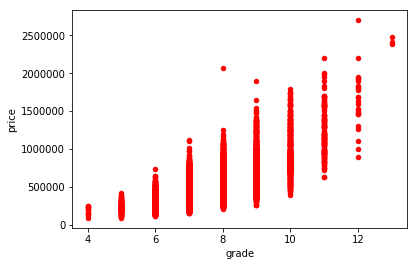

In [11]:
plot = dataset4_solution.plot(kind='scatter', x='grade', y='price', color='r')  
print(plot)

* There are outliers.

Axes(0.125,0.125;0.775x0.755)


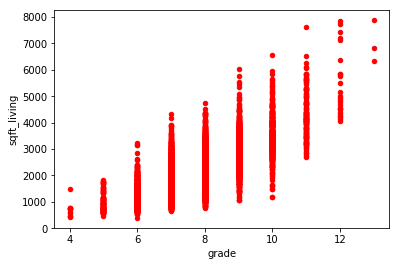

In [12]:
plot = dataset4_solution.plot(kind='scatter', x='grade', y='sqft_living', color='r')  
print(plot)

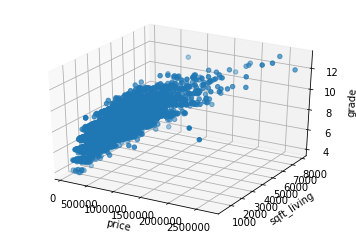

In [13]:
# Since the three variables are correlated let's use a 3d plot to visualise the data.
plot = plt.figure().gca(projection='3d')
plot.scatter(dataset4_solution["price"], dataset4_solution['sqft_living'], dataset4_solution['grade'])
plot.set_xlabel('price')
plot.set_ylabel('sqft_living')
plot.set_zlabel('grade')
plt.show()

* As seen from the above 3d plot there seems to be definite outliers.
* We will use 3 sigma standard deviation principle to remove the outliers.
* Infact we will remove two types of outliers:
* 1) One type of outliers where price, sqft_living, grade are all above Q3 + 3.5(IQR). (Type 1 outliers)
* 2) Other types of outliers where price is high but other two values are really low. (Abnormal outliers) (Type 2 outliers)
* Note: Lower bound is not considered as most outliers seems to be in upper bounds.(from plots)

In [14]:
# Let's find out the Q3 + 3.5(IQR) for price.
dataset4_solution["price"].describe()

count    9.986000e+03
mean     4.981141e+05
std      2.541180e+05
min      8.995000e+04
25%      3.200000e+05
50%      4.400000e+05
75%      6.100000e+05
max      2.700000e+06
Name: price, dtype: float64

In [15]:
upper_bound_price = 610000 + 3.5*(610000-320000)

In [16]:
# Let's find out the Q3 + 3.5(IQR) for sqft_living.
dataset4_solution["sqft_living"].describe()

count    9986.000000
mean     2025.141098
std       854.920907
min       390.000000
25%      1400.000000
50%      1870.000000
75%      2480.000000
max      7880.000000
Name: sqft_living, dtype: float64

In [17]:
upper_bound_sqft_living = 2480 + 3.5*(2480-1400)

In [18]:
# Let's find out the Q3 + 3.5(IQR) for grade.
dataset4_solution["grade"].describe()

count    9986.000000
mean        7.593631
std         1.112723
min         4.000000
25%         7.000000
50%         7.000000
75%         8.000000
max        13.000000
Name: grade, dtype: float64

In [19]:
upper_bound_grade = 8 + 3.5*(8-7)

* Let's remove the Type 1 outliers:

In [20]:
dataset4_solution = dataset4_solution.drop(dataset4_solution[(dataset4_solution["price"] > upper_bound_price) & 
                                               (dataset4_solution["sqft_living"] > upper_bound_sqft_living) &
                                               (dataset4_solution["grade"] > upper_bound_grade)].index)

In [21]:
len(dataset4_solution)
# 8 values removed

9978

* Let's remove Type 2 Outliers where price is high but other two correlated values are low.

In [22]:
dataset4_solution = dataset4_solution.drop(dataset4_solution[(dataset4_solution["price"] > upper_bound_price) & 
                                               (dataset4_solution["sqft_living"] < upper_bound_sqft_living) &
                                               (dataset4_solution["grade"] < upper_bound_grade)].index)

In [23]:
len(dataset4_solution)
# 28 values removed

9950

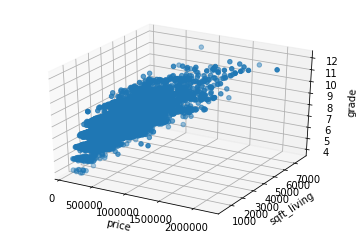

In [24]:
# Let's plot the 3d plot again to have a look at the outliers.
plot = plt.figure().gca(projection='3d')
plot.scatter(dataset4_solution["price"], dataset4_solution['sqft_living'], dataset4_solution['grade'])
plot.set_xlabel('price')
plot.set_ylabel('sqft_living')
plot.set_zlabel('grade')
plt.show()

* As seen, most of the outliers are removed and the plot looks much better than the previous one with outliers.

#### 5) Considering above 70% correlation: we have bathrooms and sqft_living related to each other. (from correlation matrix)
* Let's remove the outliers from them.

Axes(0.125,0.125;0.775x0.755)


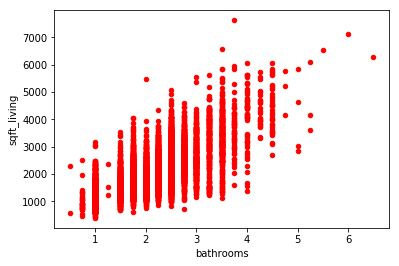

In [25]:
# Let's plot a scatter plot to have a look at the outliers.
plot = dataset4_solution.plot(kind='scatter', x='bathrooms', y='sqft_living', color='r')  
print(plot)

In [26]:
# Let's find out the Q3 + 3.5(IQR) for bathrooms.
dataset4_solution["bathrooms"].describe()

count    9950.000000
mean        2.076809
std         0.729762
min         0.500000
25%         1.500000
50%         2.250000
75%         2.500000
max         6.500000
Name: bathrooms, dtype: float64

In [27]:
upper_bound_bathrooms = 2.5 + 3.5*(2.5-1.5)
upper_bound_bathrooms

6.0

In [28]:
# Type 1 Outliers:
dataset4_solution = dataset4_solution.drop(dataset4_solution[(dataset4_solution["sqft_living"] > upper_bound_sqft_living) &
                                               (dataset4_solution["bathrooms"] > upper_bound_bathrooms)].index)

In [29]:
len(dataset4_solution) # no outliers in this range.

9950

In [30]:
# Type 2 Outliers:
dataset4_solution = dataset4_solution.drop(dataset4_solution[(dataset4_solution["sqft_living"] > upper_bound_sqft_living) &
                                               (dataset4_solution["bathrooms"] < upper_bound_bathrooms)].index)

In [31]:
len(dataset4_solution)
# 3 values removed

9947

#### 6) Let's use 3d plots to know more about the relationship between sqft_living, sqft_above, grade.

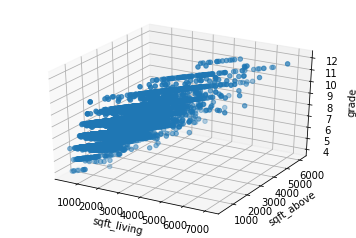

In [32]:
# Since the three variables are correlated let's use a 3d plot to visualise the data.
plot = plt.figure().gca(projection='3d')
plot.scatter(dataset4_solution["sqft_living"], dataset4_solution['sqft_above'], dataset4_solution['grade'])
plot.set_xlabel('sqft_living')
plot.set_ylabel('sqft_above')
plot.set_zlabel('grade')
plt.show()

In [33]:
# Let's find out the Q3 + 3.5(IQR) for bathrooms.
dataset4_solution["sqft_above"].describe()

count    9947.000000
mean     1740.363929
std       771.012579
min       390.000000
25%      1180.000000
50%      1530.000000
75%      2150.000000
max      6110.000000
Name: sqft_above, dtype: float64

In [34]:
upper_bound_sqft_above = 2150 + 3.5*(2150-1180)
upper_bound_sqft_above

5545.0

In [35]:
# Type 1 outliers.
dataset4_solution = dataset4_solution.drop(dataset4_solution[(dataset4_solution["sqft_above"] > upper_bound_sqft_above) & 
                                               (dataset4_solution["sqft_living"] > upper_bound_sqft_living) &
                                               (dataset4_solution["grade"] > upper_bound_grade)].index)

In [36]:
# Type 2 outliers.
dataset4_solution = dataset4_solution.drop(dataset4_solution[(dataset4_solution["sqft_living"] > upper_bound_sqft_living) & 
                                               (dataset4_solution["sqft_above"] < upper_bound_sqft_above) &
                                               (dataset4_solution["grade"] < upper_bound_grade)].index)

In [37]:
len(dataset4_solution)

9947

* Let's reduce our upper bound values and check for outliers since there are no outliers in this ranges.

In [38]:
upper_bound_sqft_living_2 = 2480 + 2.5*(2480-1400)
upper_bound_sqft_above_2 = 2150 + 2.5*(2150-1180)
upper_bound_grade_2 = 8 + 2.5*(8-7)

In [39]:
# Type 1 outliers.
dataset4_solution = dataset4_solution.drop(dataset4_solution[(dataset4_solution["sqft_above"] > upper_bound_sqft_above_2) & 
                                               (dataset4_solution["sqft_living"] > upper_bound_sqft_living_2) &
                                               (dataset4_solution["grade"] > upper_bound_grade_2)].index)

In [40]:
len(dataset4_solution)
# 15 values removed

9932

In [41]:
# Type 2 outliers.
dataset4_solution = dataset4_solution.drop(dataset4_solution[(dataset4_solution["sqft_living"] > upper_bound_sqft_living_2) & 
                                                             (dataset4_solution["sqft_above"] < upper_bound_sqft_above_2) &
                                                             (dataset4_solution["grade"] < upper_bound_grade_2)].index)


In [42]:
len(dataset4_solution)
# 11 outliers removed

9923

* Since grade is also related to sqft_living and sqft_above (from the corelation matrix). We can check for more Type 2 outliers in the below way.

In [43]:
# Type 2 outliers. (Let's stick to first upper bounds here)
dataset4_solution = dataset4_solution.drop(dataset4_solution[(dataset4_solution["sqft_living"] < upper_bound_sqft_living) & 
                                                             (dataset4_solution["sqft_above"] < upper_bound_sqft_above) &
                                                             (dataset4_solution["grade"] > upper_bound_grade)].index)


In [44]:
len(dataset4_solution)
# 19 outliers removed

9904

* Since sqft_above is also related to sqft_living and grade (from the corelation matrix). We can check for more Type 2 outliers in the below way.

In [45]:
# Type 2 outliers. (Let's use first upper bounds here)
dataset4_solution = dataset4_solution.drop(dataset4_solution[(dataset4_solution["sqft_living"] < upper_bound_sqft_living) & 
                                                             (dataset4_solution["sqft_above"] > upper_bound_sqft_above) &
                                                             (dataset4_solution["grade"] < upper_bound_grade)].index)


In [46]:
# Since we didn't find any outliers let's use second upper bounds and check.
dataset4_solution = dataset4_solution.drop(dataset4_solution[(dataset4_solution["sqft_living"] < upper_bound_sqft_living_2) & 
                                                             (dataset4_solution["sqft_above"] > upper_bound_sqft_above_2) &
                                                             (dataset4_solution["grade"] < upper_bound_grade_2)].index)


In [47]:
len(dataset4_solution)
# 8 outliers removed/

9896

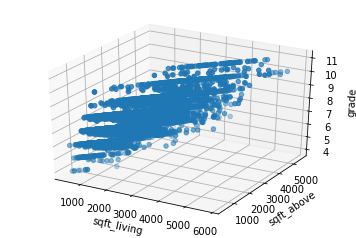

In [48]:
# let's use a 3d plot to visualise the data now.
plot = plt.figure().gca(projection='3d')
plot.scatter(dataset4_solution["sqft_living"], dataset4_solution['sqft_above'], dataset4_solution['grade'])
plot.set_xlabel('sqft_living')
plot.set_ylabel('sqft_above')
plot.set_zlabel('grade')
plt.show()

* As it can be seen, most of the outliers are removed and the plot looks much better than the previous one.

* Over all 82 outliers have been removed using the above techniques. All other values are assumed to be normal values.

In [49]:
# Let's save the file.
dataset4_solution.to_csv('dataset4_solution.csv', sep=',',index=False)
print("Please check the working directoy for dataset4_solution.csv")

Please check the working directoy for dataset4_solution.csv


#### End of Task4.